In [1]:
import pandas as pd
import numpy as np

# 랜덤 시드 고정
np.random.seed(42)

num_samples = 100


data = {
    "income": np.random.normal(loc=4000, scale=1000, size=num_samples),
    "expenses": np.random.normal(loc=2000, scale=500, size=num_samples),
}

df = pd.DataFrame(data)

# 이상치 추가
num_outliers = 7

# income 열에 대한 이상치 추가
df.loc[np.random.choice(df.index, num_outliers), "income"] = (
    df["income"].mean() + 5 * df["income"].std()
)
# expenses 열에 대한 이상치 추가
df.loc[np.random.choice(df.index, num_outliers), "expenses"] = (
    df["expenses"].mean() + 5 * df["expenses"].std()
)

df.loc[55] = [0, 0]
df.loc[44] = [10000, 10000]

print(df.head())

        income     expenses
0  4496.714153  1292.314629
1  8436.995623  1789.677339
2  4647.688538  1828.642742
3  5523.029856  1598.861365
4  3765.846625  1919.357144


In [9]:
# 이상치 탐색

# 이상치 탐색 열 분리
column = df["income"]

# DataFrame.quantile()
Q1 = column.quantile(0.25)  # 1사분위수
Q3 = column.quantile(0.75)  # 3사분위수
IQR = Q3 - Q1

# 이상치 경계값(하한, 상한)
lower_bound = Q1 - 1.5 * IQR  # 하한 경계선
upper_bound = Q3 + 1.5 * IQR  # 상한 경계선

# 하한보다 작거나(or) 상한 보다 큰 데이터를 필터링
filtering = (column < lower_bound) | (column > upper_bound)

# 수익 열(column 변수) 에서 필터(flitering 변수) 적용
outlier = df.loc[filtering]
print(outlier)

          income      expenses
1    8436.995623   1789.677339
8    8436.995623   2128.775195
16   8436.995623   1982.644115
32   8436.995623   1468.848143
42   8436.995623   1196.258383
44  10000.000000  10000.000000
47   8436.995623   1339.771693
55      0.000000      0.000000
74   1380.254896   2138.345400
89   8436.995623   1242.576388


<Axes: >

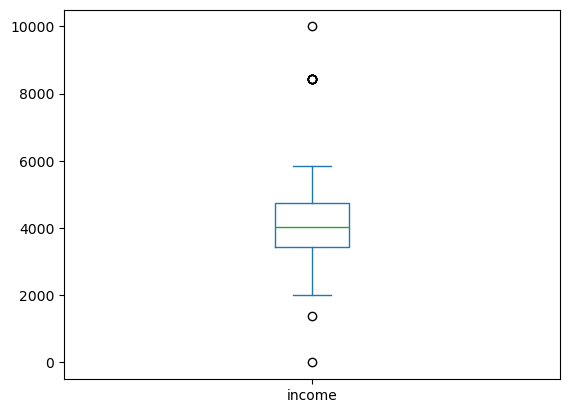

In [11]:
# 상자그림 시각화 이상치 확인
df['income'].plot.box()

<Axes: xlabel='income', ylabel='expenses'>

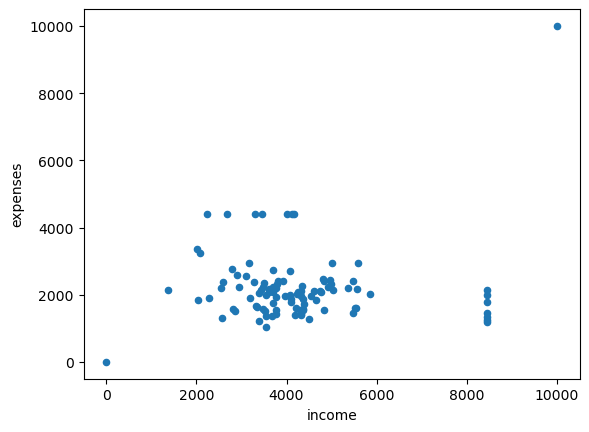

In [12]:
df.plot.scatter(x="income", y="expenses")